In [50]:
import skimage.io as io
imagen=io.imread(fname="ducks01_0100.jpg")

In [160]:
import matplotlib.pyplot as plt
def mostrar_imagen(imagen):
    fig,ax=plt.subplots(figsize=[4,4])
    ax.imshow(imagen)
    plt.show()
    
def mostrar_imagen_bn(imagen):
    fig,ax=plt.subplots(figsize=[4,4])
    ax.imshow(imagen,cmap='gray')
    plt.show()

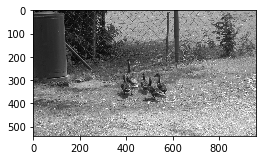

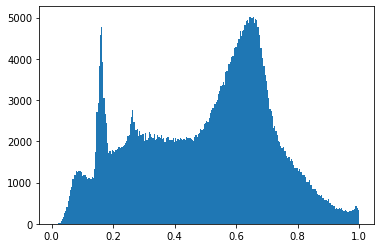

In [161]:
from skimage.color import rgb2gray
from skimage.filters import gaussian
imagen_blanco_negro=rgb2gray(imagen)
mostrar_imagen_bn(imagen_blanco_negro)
plt.hist(imagen_blanco_negro.ravel(),bins=255)
plt.show()

In [162]:
from skimage.filters import gaussian
from scipy import ndimage, misc
from sklearn.feature_extraction import image
minx=370
maxx=580
miny=210
maxy=390
imagen_segmento_color=imagen[miny:maxy,minx:maxx]

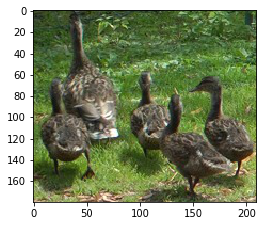

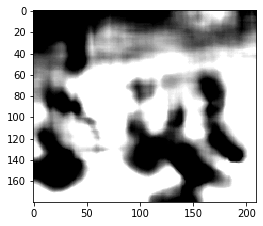

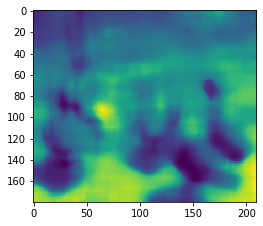

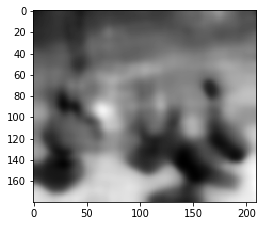

In [163]:
import skimage.exposure as skie
mostrar_imagen(imagen_segmento_color)
imagen_gray = rgb2gray(image_filtro)
img_tmp=skie.rescale_intensity(imagen_gray, in_range=(0.25, .35), out_range=(0, 1))
mostrar_imagen_bn(img_tmp)
image_m=imagen_gray.copy()
mostrar_imagen(image_mt)
imagen_filtro_gaus=gaussian(image_mt,2)
mostrar_imagen_bn(imagen_filtro_gaus)

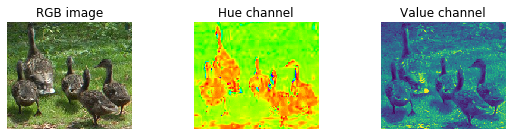

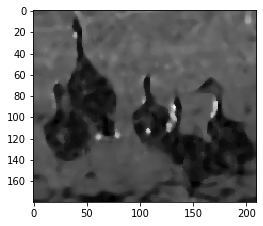

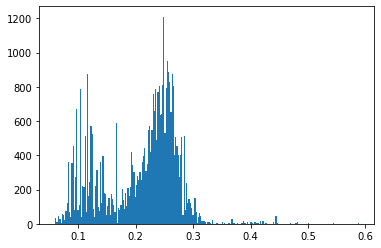

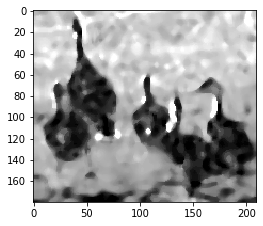

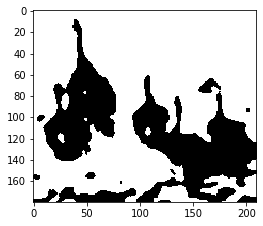

In [174]:
from skimage.color import rgb2hsv
import skimage.filters as skfilt
rgb_img = imagen_segmento_color
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')
fig.tight_layout()
med_denoised = ndimage.median_filter(hue_img, 6)
mostrar_imagen_bn(med_denoised)
plt.hist(med_denoised.ravel(),bins=255)
img_tmp=skie.rescale_intensity(med_denoised, in_range=(0.08, .30), out_range=(0, 1))
mostrar_imagen_bn(img_tmp)
thresh =  skfilt.threshold_otsu(img_tmp)
binary = img_tmp > thresh
mostrar_imagen_bn(binary)

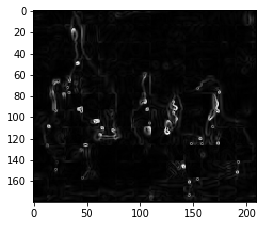

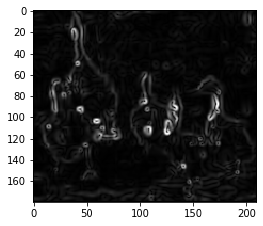

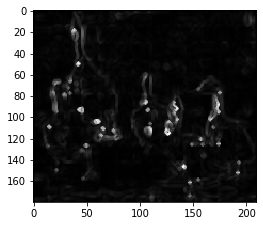

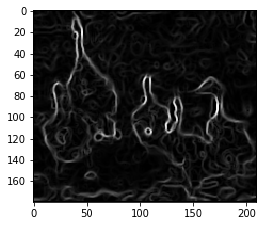

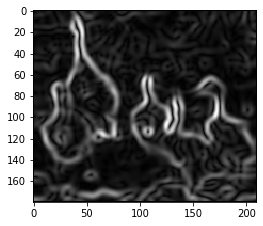

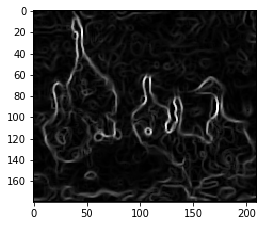

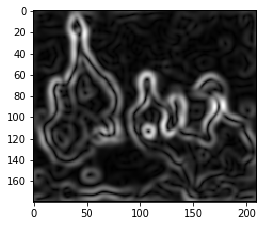

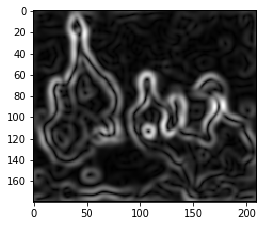

In [170]:
import skimage.feature as feature
sobel = skfilt.sobel(hue_img)
mostrar_imagen_bn(sobel)
sobel_gauss=skfilt.sobel(gaussian(hue_img,1))
mostrar_imagen_bn(sobel_gauss)
med_dsob = ndimage.median_filter(sobel, 2)
mostrar_imagen_bn(med_dsob)



sobel = skfilt.sobel(img_tmp)
mostrar_imagen_bn(sobel)
sobel_gauss=skfilt.sobel(gaussian(img_tmp,2))
mostrar_imagen_bn(sobel_gauss)

prewitt = skfilt.prewitt(img_tmp)
mostrar_imagen_bn(prewitt)
sobel_gauss=skfilt.sobel(gaussian(prewitt,3))
mostrar_imagen_bn(sobel_gauss)


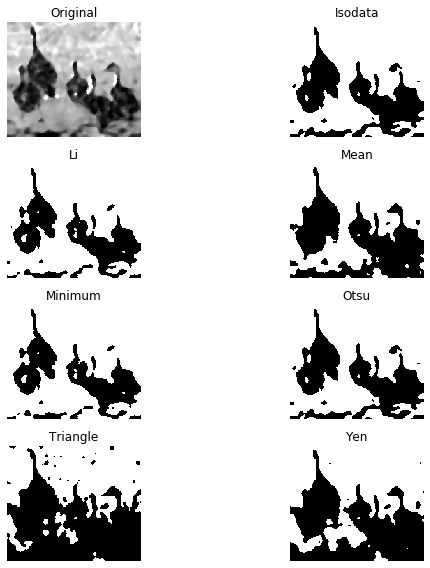

In [134]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img_tmp, figsize=(10, 8), verbose=False)
plt.show()

0.401373901403001

array([[ 0,  0,  0, ...,  3,  3,  3],
       [ 0,  0,  0, ...,  3,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [22, 22, 22, ..., 11, 11, 11],
       [22, 22, 22, ..., 11, 11, 11],
       [22, 22, 22, ..., 11, 11, 11]], dtype=int64)

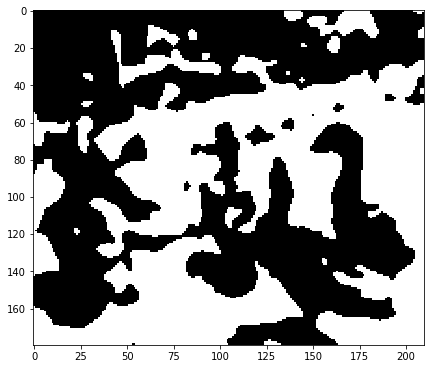

In [40]:
import skimage.filters as skfilt
from skimage.measure import label
from skimage.measure import regionprops
thresh_val = skfilt.threshold_otsu(imagen_filtro_gaus)
display(thresh_val)
new_mask = imagen_filtro_gaus > thresh_val
object_labels = label(new_mask)
display(object_labels)
some_props = regionprops(object_labels)
areas = [p.area for p in some_props]
areas_total= [ (object_labels == l).sum() 
         for l in range(1, object_labels.max()+1) ] 
mostrar_imagen_bn(new_mask)

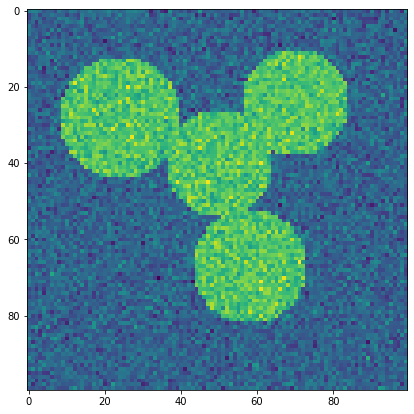

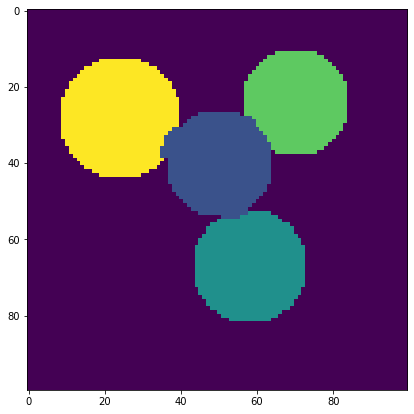

In [57]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)
radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2
circle2 = (x - center2[0])**2 + (y - center2[1])**2 < radius2**2
circle3 = (x - center3[0])**2 + (y - center3[1])**2 < radius3**2
circle4 = (x - center4[0])**2 + (y - center4[1])**2 < radius4**2

# 4 circles
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2*np.random.randn(*img.shape)
# Convert the image into a graph with the value of the gradient on
# the edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependant from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data/graph.data.std())

labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels
mostrar_imagen(img)
mostrar_imagen(label_im)